In [5]:
import os
import glob
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# os

In [2]:
os.getcwd()
# 경로의 현재 위치

'C:\\tools\\Scripts\\07.24 25 26'

In [3]:
os.listdir()
# 경로의 현재 파일 리스트

['.ipynb_checkpoints', '07.24.ipynb', 'data', 'ml-1m']

In [6]:
os.listdir('c:/')
# 경로의 파일 리스트

['$Recycle.Bin',
 'AVScanner.ini',
 'Documents and Settings',
 'hiberfil.sys',
 'Intel',
 'MSOCache',
 'Nexon',
 'pagefile.sys',
 'PerfLogs',
 'Program Files',
 'Program Files (x86)',
 'ProgramData',
 'Recovery',
 'swapfile.sys',
 'System Volume Information',
 'tools',
 'Users',
 'Windows',
 'workspace']

In [7]:
os.listdir('..')
# 상위 파일 리스트

['.ipynb_checkpoints',
 '06.21',
 '06.22',
 '06.25',
 '06.26',
 '06.27',
 '06.29',
 '07.02',
 '07.03',
 '07.04',
 '07.06',
 '07.09',
 '07.11',
 '07.13',
 '07.16',
 '07.17',
 '07.24 25 26',
 'hw',
 'study']

In [9]:
# 워킹 디렉토리 변경
# os.chidr('C:/')
# printw(os.getwd())

# glob

In [11]:
glob.glob('ml-1m/*.dat')

['ml-1m\\movies.dat', 'ml-1m\\ratings.dat', 'ml-1m\\users.dat']

# Pandas

In [60]:
unames = ['user_id', 'gender', 'age', 'occupation', 'zip']
rnames = ['user_id', 'movie_id', 'rating', 'timestamp']
mnames = ['movie_id', 'title', 'genres']

users = pandas.read_csv('ml-1m/users.dat', sep= '::', header = None, names = unames)
ratings = pandas.read_csv('ml-1m/ratings.dat', sep= '::', header = None, names = rnames)
movies = pandas.read_csv('ml-1m/movies.dat', sep= '::', header = None, names = mnames)

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """
C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  
C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  import sys


In [30]:
users.head()

,user_id,gender,age,occupation,zip
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [61]:
ratings.head()

,user_id,movie_id,rating,timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [24]:
movies.head()

,movie_id,title,genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [28]:
users.shape, ratings.shape, movies.shape

((6040, 5), (1000209, 4), (3883, 3))

In [64]:
merge_data = pandas.merge(ratings, users)
data = pandas.merge(merge_data, movies)
data.shape

(1000209, 10)

In [65]:
mean_ratings = data.pivot_table(values = 'rating', index = 'title', columns = 'gender', aggfunc = 'mean')
mean_ratings[:5]

gender,F,M
title,,
"$1,000,000 Duck (1971)",3.375000,2.761905
'Night Mother (1986),3.388889,3.352941
'Til There Was You (1997),2.675676,2.733333
"'burbs, The (1989)",2.793478,2.962085
...And Justice for All (1979),3.828571,3.689024


In [66]:
table = pd.pivot_table(data, values = 'rating', index = 'title', aggfunc = [len, np.sum, np.mean],  
                           fill_value = 0)
table.head()

,len,sum,mean
,rating,rating,rating
title,,,
"$1,000,000 Duck (1971)",37,112,3.027027
'Night Mother (1986),70,236,3.371429
'Til There Was You (1997),52,140,2.692308
"'burbs, The (1989)",303,882,2.910891
...And Justice for All (1979),199,739,3.713568


In [67]:
data.to_csv('ml-1m/data.csv')
# 데이터 csv파일을 윈도우로 저장

# robust
이상값, 결측값 제거

In [68]:
counts = data['title'].value_counts()
counts.head()

American Beauty (1999)                                   3428
Star Wars: Episode IV - A New Hope (1977)                2991
Star Wars: Episode V - The Empire Strikes Back (1980)    2990
Star Wars: Episode VI - Return of the Jedi (1983)        2883
Jurassic Park (1993)                                     2672
Name: title, dtype: int64

## 영화별 사용자가 평점을 매긴 횟수가 250건 이상인 영화에 대해 분석 진행

In [77]:
sel_titles = counts.index[counts > 250]
sel_titles[:5]

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)'],
      dtype='object')

In [74]:
sorted_ratings_by_F = mean_ratings.sort_values(by = 'F', ascending = False)
sorted_ratings_by_F.head()

gender,F,M
title,,
Clean Slate (Coup de Torchon) (1981),5.0,3.857143
"Ballad of Narayama, The (Narayama Bushiko) (1958)",5.0,3.428571
Raw Deal (1948),5.0,3.307692
Bittersweet Motel (2000),5.0,NaN
Skipped Parts (2000),5.0,4.000000


## 남성에게 평균적으로 높은 평점을 받은 영화들을 확인

In [75]:
mean_ratings['diff'] = mean_ratings['M'] - mean_ratings['F']
sorted_by_diff = mean_ratings.sort_values(by = 'diff', ascending = False)
sorted_by_diff.head(7)

gender,F,M,diff
title,,,
Tigrero: A Film That Was Never Made (1994),1.0,4.333333,3.333333
"Neon Bible, The (1995)",1.0,4.000000,3.000000
"Enfer, L' (1994)",1.0,3.750000,2.750000
Stalingrad (1993),1.0,3.593750,2.593750
Killer: A Journal of Murder (1995),1.0,3.428571,2.428571
Dangerous Ground (1997),1.0,3.333333,2.333333
Rosie (1998),1.0,3.333333,2.333333


## 사용자의 호불호가 확실히 나뉘는 영화

In [79]:
rating_std_by_title = data.groupby('title')['rating'].std()
# selected 영화만 선택
rating_std_by_title = rating_std_by_title.loc[sel_titles]
rating_std_by_title.sort_values(ascending = False).head(10)

Dumb & Dumber (1994)                     1.321333
Blair Witch Project, The (1999)          1.316368
Natural Born Killers (1994)              1.307198
Tank Girl (1995)                         1.277695
Rocky Horror Picture Show, The (1975)    1.260177
Eyes Wide Shut (1999)                    1.259624
Evita (1996)                             1.253631
Billy Madison (1995)                     1.249970
Fear and Loathing in Las Vegas (1998)    1.246408
Bicentennial Man (1999)                  1.245533
Name: rating, dtype: float64

#### 직접해보기
사용자별로 영화에 대한 평점을 계산한 뒤 아래 항목을 확인하기

사용자마다 평가한 영화의 수에 대한 기초통계량(min, mean, max, std)

사용자마다 평가한 영화의 수가 500이상인 사용자들에 대해 아래를 진행

남자사용자들의 평균 평점과 여자사용자들의 평균 평점 비교

평균적으로 높은 평점을 부여하는 사용자 확인

평균적으로 낮은 평점을 부여하는 사용자 확인

영화마다 다양한 평점을 부여하는 사용자 확인

In [92]:
data.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


data.groupby('user_id').describe().head(10)

In [86]:
data.groupby('user_id')['rating'].min().head()

user_id
1    3
2    1
3    1
4    1
5    1
Name: rating, dtype: int64

In [91]:
data.groupby('user_id')['rating'].mean().head()

user_id
1    4.188679
2    3.713178
3    3.901961
4    4.190476
5    3.146465
Name: rating, dtype: float64

In [87]:
data.groupby('user_id')['rating'].max().head()

user_id
1    5
2    5
3    5
4    5
5    5
Name: rating, dtype: int64

In [88]:
data.groupby('user_id')['rating'].std().head()

user_id
1    0.680967
2    1.001513
3    0.984985
4    1.077917
5    1.132699
Name: rating, dtype: float64

In [93]:
sel_titles = counts.index[counts > 500]
sel_titles[:5]

Index(['American Beauty (1999)', 'Star Wars: Episode IV - A New Hope (1977)',
       'Star Wars: Episode V - The Empire Strikes Back (1980)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Jurassic Park (1993)'],
      dtype='object')

In [94]:
data.groupby('gender')['rating'].mean()

gender
F    3.620366
M    3.568879
Name: rating, dtype: float64

In [98]:
data.groupby('user_id')['rating'].mean().sort_values(ascending = False).head(10)

user_id
283     4.962963
2339    4.956522
3324    4.904762
3902    4.890909
446     4.843137
447     4.837838
4649    4.818182
4634    4.813725
1131    4.796117
4925    4.761905
Name: rating, dtype: float64

In [99]:
data.groupby('user_id')['rating'].mean().sort_values().head(10)

user_id
3598    1.015385
4486    1.058824
2744    1.304348
4539    1.815126
5850    1.844828
5334    1.927273
4349    1.962963
4636    2.000000
5686    2.045283
3209    2.060870
Name: rating, dtype: float64

In [103]:
data.groupby('user_id')['rating'].std().sort_values(ascending = False).head(10)

user_id
87      1.861354
4896    1.849192
1102    1.831195
3476    1.780432
4493    1.768315
5328    1.766073
206     1.760355
1445    1.738866
2244    1.713770
1754    1.711307
Name: rating, dtype: float64

# Numpy

In [107]:
points = np.arange(-5, 5, 0.01)
points

array([-5.0000000e+00, -4.9900000e+00, -4.9800000e+00, -4.9700000e+00,
       -4.9600000e+00, -4.9500000e+00, -4.9400000e+00, -4.9300000e+00,
       -4.9200000e+00, -4.9100000e+00, -4.9000000e+00, -4.8900000e+00,
       -4.8800000e+00, -4.8700000e+00, -4.8600000e+00, -4.8500000e+00,
       -4.8400000e+00, -4.8300000e+00, -4.8200000e+00, -4.8100000e+00,
       -4.8000000e+00, -4.7900000e+00, -4.7800000e+00, -4.7700000e+00,
       -4.7600000e+00, -4.7500000e+00, -4.7400000e+00, -4.7300000e+00,
       -4.7200000e+00, -4.7100000e+00, -4.7000000e+00, -4.6900000e+00,
       -4.6800000e+00, -4.6700000e+00, -4.6600000e+00, -4.6500000e+00,
       -4.6400000e+00, -4.6300000e+00, -4.6200000e+00, -4.6100000e+00,
       -4.6000000e+00, -4.5900000e+00, -4.5800000e+00, -4.5700000e+00,
       -4.5600000e+00, -4.5500000e+00, -4.5400000e+00, -4.5300000e+00,
       -4.5200000e+00, -4.5100000e+00, -4.5000000e+00, -4.4900000e+00,
       -4.4800000e+00, -4.4700000e+00, -4.4600000e+00, -4.4500000e+00,
      

In [109]:
xs, ys = np.meshgrid(points, points)
print(xs.shape)
xs

(1000, 1000)


array([[-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       ...,
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99],
       [-5.  , -4.99, -4.98, ...,  4.97,  4.98,  4.99]])

In [116]:
z = np.sqrt(xs**2 + ys**2)
print(z.shape)
z

(1000, 1000)


array([[7.07106781, 7.06400028, 7.05693985, ..., 7.04988652, 7.05693985,
        7.06400028],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       ...,
       [7.04988652, 7.04279774, 7.03571603, ..., 7.0286414 , 7.03571603,
        7.04279774],
       [7.05693985, 7.04985815, 7.04278354, ..., 7.03571603, 7.04278354,
        7.04985815],
       [7.06400028, 7.05692568, 7.04985815, ..., 7.04279774, 7.04985815,
        7.05692568]])

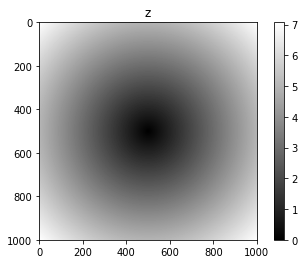

In [117]:
plt.imshow(z, cmap = plt.cm.gray)
plt.colorbar()
plt.title('Image plot of $\wqrt{x^2 + y^2}$ \ for a grid of values')
plt.title('z')
plt.show()

In [118]:
x = np.array([1.1, 1.2, 1.3, 1.4, 1.5])
y = x+1
cond = np.array([True, False, True, False, False])

In [119]:
res = np.where(cond, x, y)
res

array([1.1, 2.2, 1.3, 2.4, 2.5])

In [120]:
np.random.seed(1)
arr = np.random.randn(5, 5)
arr

array([[ 1.62434536, -0.61175641, -0.52817175, -1.07296862,  0.86540763],
       [-2.3015387 ,  1.74481176, -0.7612069 ,  0.3190391 , -0.24937038],
       [ 1.46210794, -2.06014071, -0.3224172 , -0.38405435,  1.13376944],
       [-1.09989127, -0.17242821, -0.87785842,  0.04221375,  0.58281521],
       [-1.10061918,  1.14472371,  0.90159072,  0.50249434,  0.90085595]])

#### arr의 각 원소가 0보다 크면 2, 작거나 같으면 -2를 부여

In [121]:
arr1 = np.where(arr>0, 2, -2)

In [122]:
arr1

array([[ 2, -2, -2, -2,  2],
       [-2,  2, -2,  2, -2],
       [ 2, -2, -2, -2,  2],
       [-2, -2, -2,  2,  2],
       [-2,  2,  2,  2,  2]])

In [123]:
arr2 = np.where(arr>0, 2, arr)

In [124]:
arr2

array([[ 2.        , -0.61175641, -0.52817175, -1.07296862,  2.        ],
       [-2.3015387 ,  2.        , -0.7612069 ,  2.        , -0.24937038],
       [ 2.        , -2.06014071, -0.3224172 , -0.38405435,  2.        ],
       [-1.09989127, -0.17242821, -0.87785842,  2.        ,  2.        ],
       [-1.10061918,  2.        ,  2.        ,  2.        ,  2.        ]])

In [125]:
np.where(arr>0)

(array([0, 0, 1, 1, 2, 2, 3, 3, 4, 4, 4, 4], dtype=int64),
 array([0, 4, 1, 3, 0, 4, 3, 4, 1, 2, 3, 4], dtype=int64))

# 정렬

In [129]:
arr = arr.reshape(-1)
arr.shape
# 정렬은 벡터화해서 정렬하는게 편하다

(25,)

In [131]:
arr.sort()
print(arr)
arr.argmax()

[-2.3015387  -2.06014071 -1.10061918 -1.09989127 -1.07296862 -0.87785842
 -0.7612069  -0.61175641 -0.52817175 -0.38405435 -0.3224172  -0.24937038
 -0.17242821  0.04221375  0.3190391   0.50249434  0.58281521  0.86540763
  0.90085595  0.90159072  1.13376944  1.14472371  1.46210794  1.62434536
  1.74481176]


24

In [132]:
arr[int(0.05 * len(arr))]

-2.060140709497654

In [135]:
arr[round(len(arr) * 0.5) + 1]

0.04221374671559283

# 두 배열 이어붙이기

In [151]:
arr1 = np.zeros((5, 3))
arr2 = np.ones((5, 2))
np.concatenate([arr1, arr2], axis = 1)

array([[0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.],
       [0., 0., 0., 1., 1.]])

In [158]:
arr3 = np.ones((2, 3))
np.concatenate([arr1, arr3], axis = 0)

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [1., 1., 1.],
       [1., 1., 1.]])

# 집합에 대한 함수들

In [139]:
names = np.array(['Bob', 'Joe', 'Will', 'Bob', 'Will', 'Joe', 'joe'])

In [140]:
np.unique(names)

array(['Bob', 'Joe', 'Will', 'joe'], dtype='<U4')

In [150]:
np.random.seed(1)
ind = np.random.choice(len(data), size = 200)

data1 = data.iloc[ind[:100]]
data2 = data.iloc[ind[100:]]
data1.head()

,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
128037,4785,590,4,963002918,F,25,14,55104,Dances with Wolves (1990),Adventure|Drama|Western
491755,5957,1025,3,957073471,M,18,20,02038,"Sword in the Stone, The (1963)",Animation|Children's
470924,1440,1371,3,974759142,M,35,12,94520,Star Trek: The Motion Picture (1979),Action|Adventure|Sci-Fi
791624,2761,2463,3,973150183,M,35,6,80917,Ruthless People (1986),Comedy
491263,549,1023,5,976121661,M,25,6,53217,Winnie the Pooh and the Blustery Day (1968),Animation|Children's


In [159]:
np.random.seed(1)
ind = np.random.choice(len(data), size = 200)

data1 = data.iloc[ind[:100]].reset_index()
data2 = data.iloc[ind[100:]].reset_index()
data1.head()

,index,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,128037,4785,590,4,963002918,F,25,14,55104,Dances with Wolves (1990),Adventure|Drama|Western
1,491755,5957,1025,3,957073471,M,18,20,02038,"Sword in the Stone, The (1963)",Animation|Children's
2,470924,1440,1371,3,974759142,M,35,12,94520,Star Trek: The Motion Picture (1979),Action|Adventure|Sci-Fi
3,791624,2761,2463,3,973150183,M,35,6,80917,Ruthless People (1986),Comedy
4,491263,549,1023,5,976121661,M,25,6,53217,Winnie the Pooh and the Blustery Day (1968),Animation|Children's


In [160]:
data2.head()

,index,user_id,movie_id,rating,timestamp,gender,age,occupation,zip,title,genres
0,438026,3259,1269,5,968272002,F,18,4,95616,Arsenic and Old Lace (1944),Comedy|Mystery|Thriller
1,507159,4808,62,5,962957494,M,35,0,96707-1321,Mr. Holland's Opus (1995),Drama
2,689807,4887,1258,4,962848968,M,18,2,19072,"Shining, The (1980)",Horror
3,600815,1224,1883,2,974908506,M,50,13,02125,Bulworth (1998),Comedy
4,614169,3058,553,5,970073173,M,18,12,55123,Tombstone (1993),Western


In [161]:
np.intersect1d(data1.title, data2.title)

array(['Austin Powers: International Man of Mystery (1997)',
       'Casablanca (1942)',
       'Midnight in the Garden of Good and Evil (1997)',
       "One Flew Over the Cuckoo's Nest (1975)", 'Pleasantville (1998)',
       'Ransom (1996)', 'Star Trek: The Motion Picture (1979)',
       'Star Wars: Episode VI - Return of the Jedi (1983)',
       'Stir of Echoes (1999)'], dtype=object)

In [162]:
len(np.union1d(data1.title, data2.title))

183

#### data1의 영화목록 중 data2의 영화 목록을 제외

In [163]:
np.setdiff1d(data1.title, data2.title)

array(['Adventures of Milo and Otis, The (1986)', 'Alien (1979)',
       'American Tail, An (1986)', 'Barb Wire (1996)', 'Big (1988)',
       'Blade (1998)', 'Breakfast Club, The (1985)', 'Carrie (1976)',
       'Chasing Amy (1997)', 'Clerks (1994)', 'Clueless (1995)',
       'Conspiracy Theory (1997)', 'Contact (1997)',
       'Crimson Tide (1995)', 'Crocodile Dundee (1986)',
       'Croupier (1998)', 'Cyrano de Bergerac (1990)',
       'Dances with Wolves (1990)', 'Dick Tracy (1990)',
       'Double Indemnity (1944)', 'Fargo (1996)',
       'Field of Dreams (1989)', 'George of the Jungle (1997)',
       'Ghosts of Mississippi (1996)', 'Godzilla (1998)',
       'Grapes of Wrath, The (1940)', 'Gremlins (1984)',
       'Grifters, The (1990)', 'Grumpy Old Men (1993)',
       'Heartburn (1986)', 'Henry Fool (1997)', 'High Noon (1952)',
       'Jaws 3-D (1983)', 'Jumanji (1995)', 'Jurassic Park (1993)',
       'Karate Kid, Part II, The (1986)', 'Leaving Las Vegas (1995)',
       'Lethal We

In [164]:
np.setxor1d(data1.title, data2.title)

array(['2001: A Space Odyssey (1968)', 'Abyss, The (1989)',
       'Addams Family Values (1993)',
       'Adventures of Milo and Otis, The (1986)', 'Akira (1988)',
       'Alien (1979)', 'American Pie (1999)', 'American Tail, An (1986)',
       'Arachnophobia (1990)', 'Arsenic and Old Lace (1944)',
       'Barb Wire (1996)', 'Batman (1989)', 'Being John Malkovich (1999)',
       'Bicentennial Man (1999)', 'Big (1988)', 'Blade (1998)',
       'Body Snatchers (1993)', 'Brady Bunch Movie, The (1995)',
       'Breakfast Club, The (1985)', "Bug's Life, A (1998)",
       'Bulworth (1998)', 'Carrie (1976)', 'Casper (1995)',
       'Chasing Amy (1997)', 'Chicken Run (2000)',
       'Christmas Vacation (1989)', 'Clerks (1994)',
       'Close Encounters of the Third Kind (1977)',
       'Close Shave, A (1995)', 'Clueless (1995)',
       'Color of Money, The (1986)', 'Conspiracy Theory (1997)',
       'Contact (1997)', 'Cool Runnings (1993)', 'Cop Land (1997)',
       'Crimson Tide (1995)', 'Croc

# 자료 저장하기/불러오기

In [165]:
arr = np.random.randn(5,5)
arr

array([[-0.22232814, -0.20075807,  0.18656139,  0.41005165,  0.19829972],
       [ 0.11900865, -0.67066229,  0.37756379,  0.12182127,  1.12948391],
       [ 1.19891788,  0.18515642, -0.37528495, -0.63873041,  0.42349435],
       [ 0.07734007, -0.34385368,  0.04359686, -0.62000084,  0.69803203],
       [-0.44712856,  1.2245077 ,  0.40349164,  0.59357852, -1.09491185]])

In [166]:
np.save('arr', arr)
# arr이라는 파일을 경로에 저장한다. 'arr'이름을 가지고

In [169]:
file_name = glob.glob('*.npy')
np.load(file_name[0])

array([[-0.22232814, -0.20075807,  0.18656139,  0.41005165,  0.19829972],
       [ 0.11900865, -0.67066229,  0.37756379,  0.12182127,  1.12948391],
       [ 1.19891788,  0.18515642, -0.37528495, -0.63873041,  0.42349435],
       [ 0.07734007, -0.34385368,  0.04359686, -0.62000084,  0.69803203],
       [-0.44712856,  1.2245077 ,  0.40349164,  0.59357852, -1.09491185]])

In [171]:
np.savez('multiple_arr', a = arr, b = arr) # npz로 저장

In [173]:
aa = np.load('multiple_arr.npz')

In [174]:
np.savetxt('arr.txt', arr, delimiter = ' ')
np.loadtxt('arr.txt')

# Matplotlib : 시각화

In [175]:
fig = plt.figure(figsize=(9,9))
# fig = plt.figure()같은거
plt.show()

<Figure size 648x648 with 0 Axes>

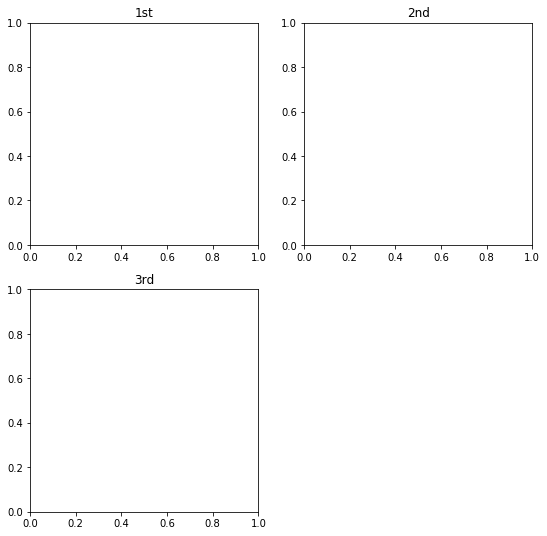

In [178]:
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(2, 2, 1)
plt.title('1st')
ax2 = fig.add_subplot(2, 2, 2)
plt.title('2nd')
ax3 = fig.add_subplot(2, 2, 3)
plt.title('3rd')
plt.show()

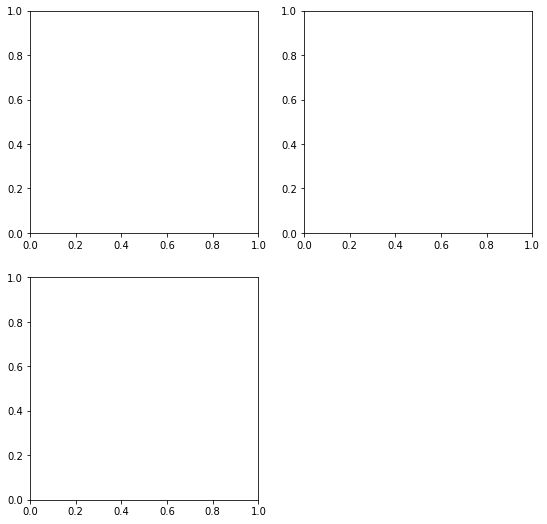

In [179]:
fig = plt.figure(figsize = (9,9))
plt.subplot(221)
plt.subplot(222)
plt.subplot(223)
plt.show()

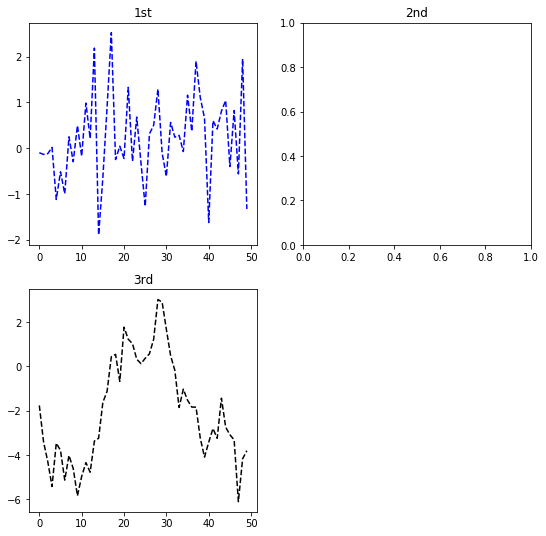

In [184]:
fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(2, 2, 1)
plt.plot(np.random.randn(50), 'b--')
plt.title('1st')
ax2 = fig.add_subplot(2, 2, 2)
plt.title('2nd')
ax3 = fig.add_subplot(2, 2, 3)
plt.title('3rd')

plt.plot(np.random.randn(50).cumsum(), 'k--')
plt.show()

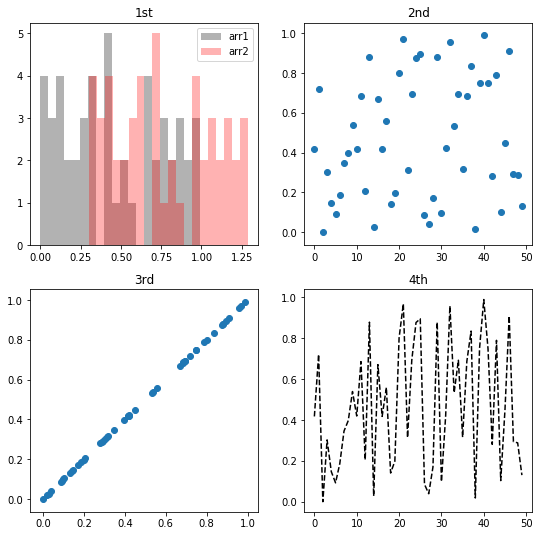

In [194]:
np.random.seed(1)
arr = np.random.rand(50)

fig = plt.figure(figsize=(9,9))
ax1 = fig.add_subplot(2, 2, 1)
plt.title('1st')
ax2 = fig.add_subplot(2, 2, 2)
plt.title('2nd')
ax3 = fig.add_subplot(2, 2, 3)
plt.title('3rd')
ax4 = fig.add_subplot(2, 2, 4)
plt.title('4th')

plt.plot(arr, 'k--')
ax1.hist(arr, bins = 20, color = 'k', alpha = 0.3, label = 'arr1') # alpha 투명도
ax1.hist(arr+0.3, bins = 20, color = 'r', alpha = 0.3, label = 'arr2') # alpha 투명도
ax1.legend()
ax2.scatter(np.arange(len(arr)), arr)
ax3.scatter(arr, arr)

plt.show()

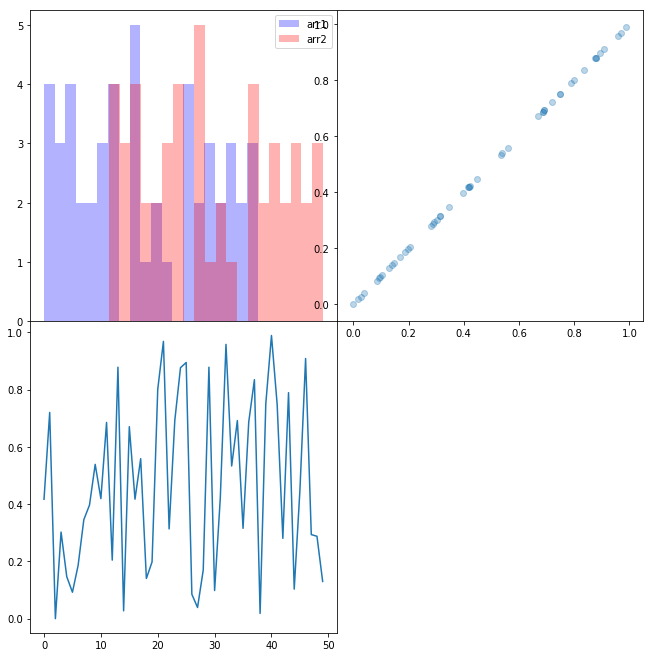

In [206]:
fig = plt.figure(figsize = (9,9))

plt.subplot(221)
plt.hist(arr, bins = 20, color = 'b', alpha = 0.3, label = 'arr1')
plt.hist(arr+0.3, bins = 20, color = 'r', alpha = 0.3, label = 'arr2')
plt.legend()
plt.tight_layout()

plt.subplot(222)
plt.scatter(arr, arr, alpha = 0.3)
plt.subplots_adjust(wspace = 0, hspace = 0)

plt.subplot(223)
plt.plot(arr)


plt.show()
plt.close()

# 그림을 파일로 저장

In [210]:
fig = plt.figure(figsize = (9,9))
ax1 = fig.add_subplot(2, 2, 1)
ax1 = fig.add_subplot(2, 2, 2)
ax1 = fig.add_subplot(2, 2, 3)

plt.plot(arr.cumsum(), 'k--')
ax1.hist(arr, bins = 20, color = 'k', alpha = 0.3)
ax2.scatter(np.arange(len(arr)), arr)
plt.savefig('figures/fig1.png', dpi = 20)
plt.savefig('figures/fig2.png', dpi = 400)
plt.savefig('figures/fig3.png', dpi = 400, bbox_inches = 'tight')

plt.close()

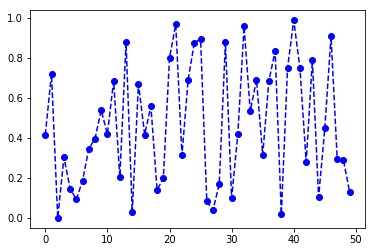

In [211]:
plt.plot(arr[:100], 'bo--')
plt.show()

In [6]:
iris = pd.read_csv('C:/tools/Scripts/07.24 25 26/data/iris.csv')

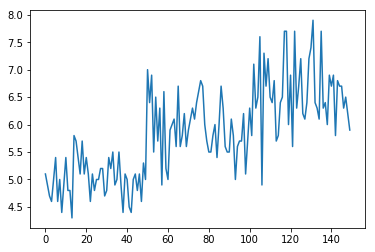

In [214]:
var = 'SepalLengthCm'
iris[var].plot()
plt.show()

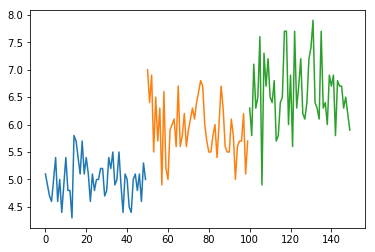

In [215]:
for key, data in iris.groupby('Species'):
    data[var].plot()
plt.show()

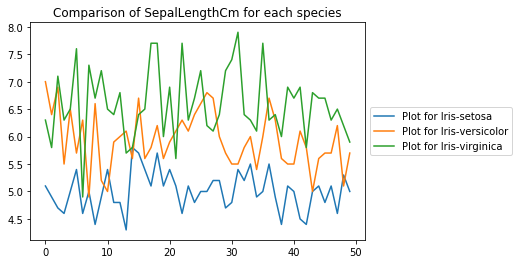

In [219]:
for key, data in iris.groupby('Species'):
    data = data.reset_index()
    data[var].plot(label = 'Plot for '+key)
plt.title('Comparison of '+var+' for each species')
plt.legend(loc = 'center left', bbox_to_anchor=(1.0, 0.5))
plt.show()

# Seaborn 라이브러리

In [1]:
import seaborn as sns

C:\tools\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
C:\tools\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


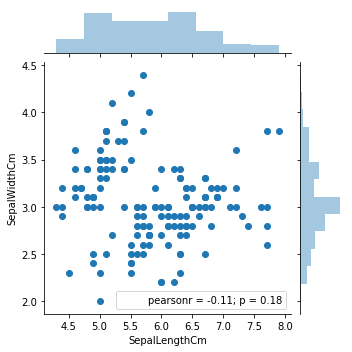

In [223]:
sns.jointplot(x = 'SepalLengthCm', y = 'SepalWidthCm', data = iris, size = 5)
plt.show()

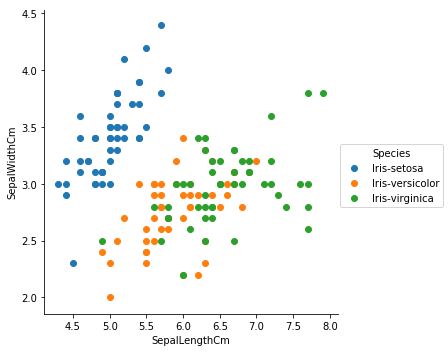

In [222]:
sns.FacetGrid(iris, hue = 'Species', size=5).map(plt.scatter, 'SepalLengthCm', 'SepalWidthCm').add_legend()
plt.show()

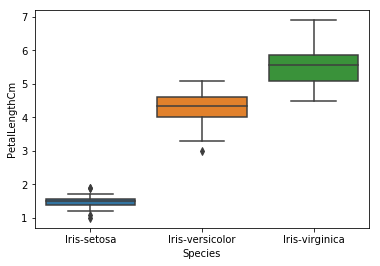

In [225]:
sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = iris)
plt.show()

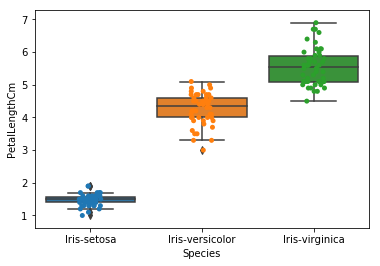

In [226]:
ax = sns.boxplot(x = 'Species', y = 'PetalLengthCm', data = iris)
ax = sns.stripplot(x = 'Species', y = 'PetalLengthCm', data = iris, jitter = True, edgecolor = 'gray')
plt.show()

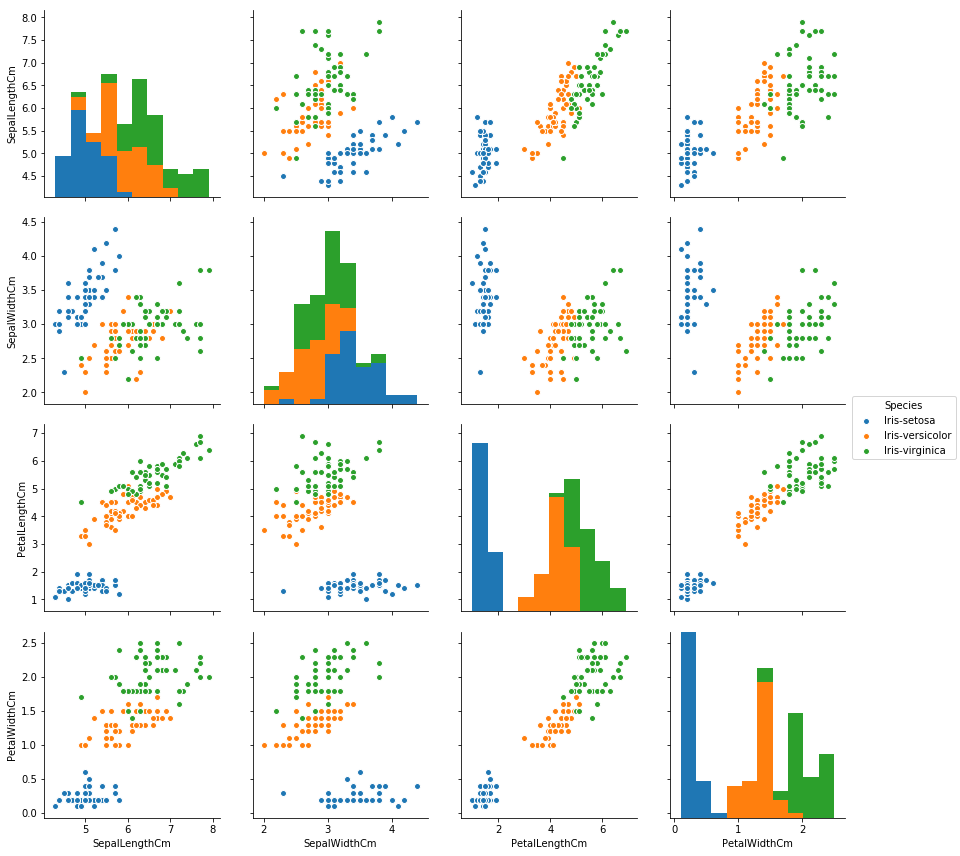

In [232]:
sns.pairplot(iris.drop('Id', axis = 1), hue = 'Species', size = 3, diag_kind = 'hist')
plt.show()

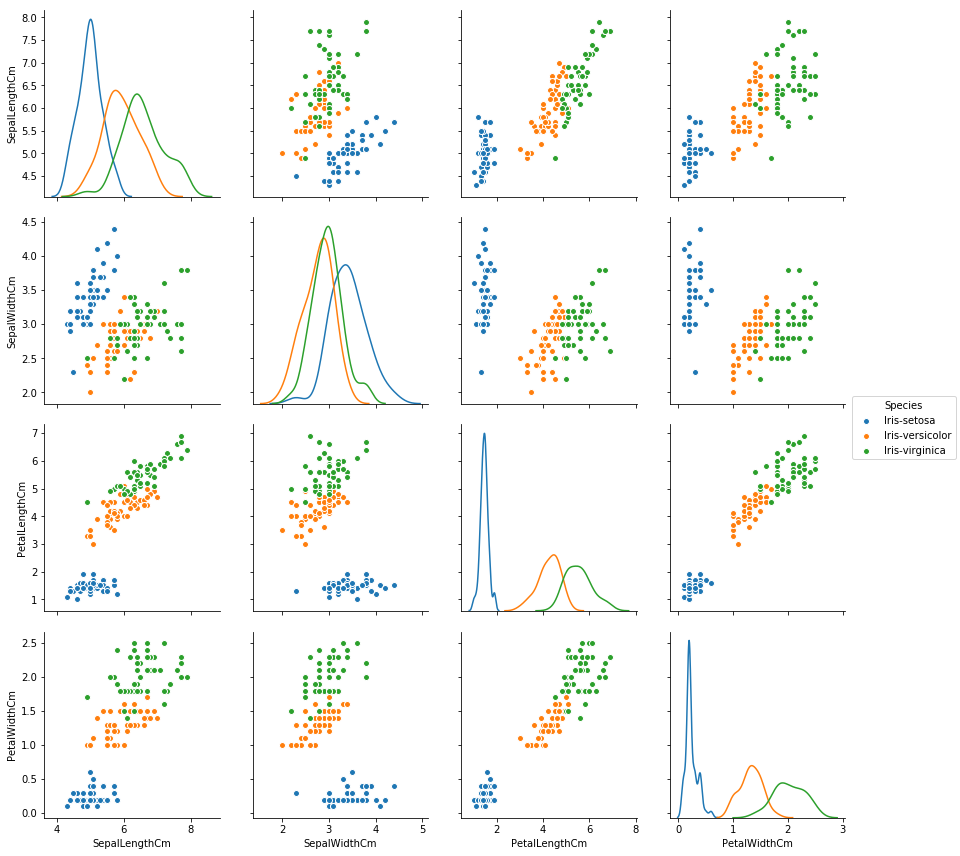

In [7]:
sns.pairplot(iris.drop('Id', axis = 1), hue = 'Species', size = 3, diag_kind = 'kde')
# kde는 kernel density estimation
plt.show()